In [17]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
from scipy import stats

FIG_DIR = "../figure/"

def plot_spectrum(spectrums, ax, label=None, full=False):
    spectrums = spectrums.replace([np.inf, -np.inf], np.nan)
    spectrums = spectrums.dropna()
    y, bin_edge, nbins = stats.binned_statistic( spectrums.omega, spectrums.power, bins=100)
    x = (bin_edge[1:] + bin_edge[:-1])/2

    ax.plot(x, y,'o-', label=label)
    if not full:
        return
    for exp, df in spectrums.groupby("exp"):
        ax.plot(df.omega, df.power)

In [18]:
with pd.HDFStore("../c2_kappa_mean_rotation.h5") as store:
    res_humans = store.get("humans")
    res_seas = store.get("sea_urchins")

In [19]:
spec_human = np.loadtxt("../human_spectrum.csv")
spec_sea = np.loadtxt("../sea_urchin_spectrum.csv")

In [20]:
WIDTH = 8.1

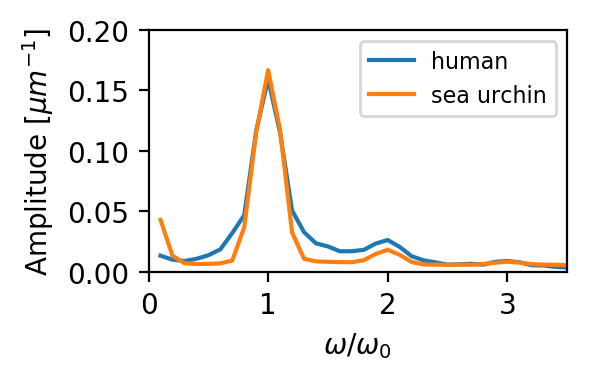

In [21]:
fig = plt.figure(figsize=(WIDTH/3.,1.6), dpi=200)
plt.plot(spec_human.T[0], spec_human.T[1], '-',label="human")
plt.plot(spec_sea.T[0], spec_sea.T[1], '-',label="sea urchin")
plt.legend(fontsize=8)
plt.xlim(0,3.5)
plt.ylim(0,0.2)
plt.xlabel(r"$\omega/\omega_0$")
plt.ylabel("Amplitude [$\\mu m^{-1}$]")
plt.savefig(FIG_DIR + "spectrum.pdf")

<ErrorbarContainer object of 3 artists>

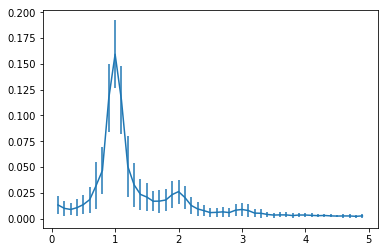

In [22]:
plt.errorbar(spec_human.T[0], spec_human.T[1], spec_human.T[2],label="human")


In [23]:
res_humans2  = res_humans.dropna()
slope, intercept, r_value, p_value, std_err = stats.linregress(res_humans2.c2_plus_cm, 
                                                               res_humans2.phi_vel_normed_s_c0)

/Local/rode/.conda/envs/py36/lib/python3.6/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]


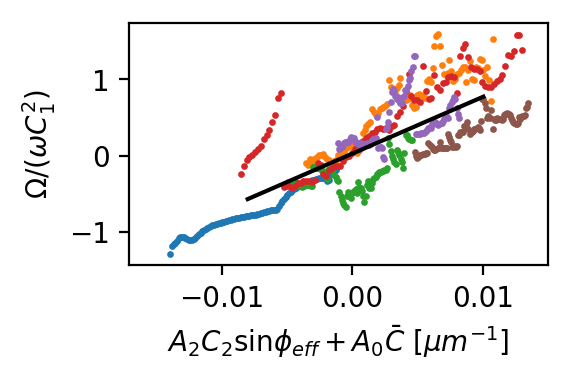

In [24]:
fig = plt.figure(figsize=(WIDTH/3.,1.6),dpi=200)

for exp, df in res_humans.dropna().groupby("exp"):
    y, bin_edge, nbins = stats.binned_statistic(df.c2_plus_cm, df.phi_vel_normed_s_c0, bins=100)
    x = (bin_edge[1:]+bin_edge[:-1])/2
    plt.scatter(x,y, s=2,label=exp.split("/")[-1])
s = np.linspace(-0.008,0.01,50)
plt.plot(s, s*slope+ intercept, c='k')
#plt.legend(ncol=2, fontsize=8, loc=3, 
#           bbox_to_anchor=(0,1.02,1.,.102), borderaxespad=0.)
plt.xlabel(r"$A_2C_2 \sin \phi_{eff} + A_0 \bar{C}\ [\mu m^{-1}]$")
plt.ylabel(r"$\Omega/(\omega C_1^2)$")
plt.savefig(FIG_DIR + "rotation_humans.pdf")

In [26]:
res_seas2  = res_seas.dropna()
slope, intercept, r_value, p_value, std_err = stats.linregress(res_seas2.c2_plus_cm, 
                                                               res_seas2.phi_vel_normed_s_c0)

/Local/rode/.conda/envs/py36/lib/python3.6/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]


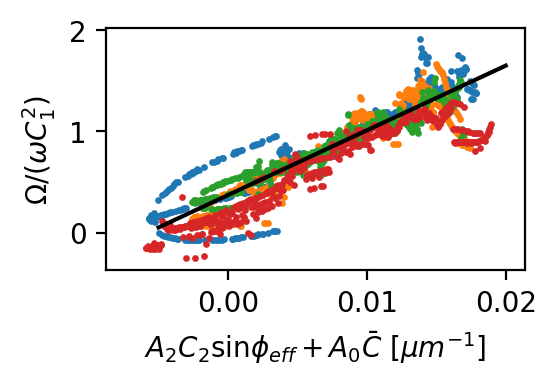

In [27]:
fig = plt.figure(figsize=(WIDTH/3.,1.6),dpi=200)

for exp, df in res_seas.dropna().groupby("exp"):
    y, bin_edge, nbins = stats.binned_statistic(df.c2_plus_cm, df.phi_vel_normed_s_c0, bins=500)
    x = (bin_edge[1:]+bin_edge[:-1])/2
    plt.scatter(x,y, s=2,label=exp.split("/")[-1])
s = np.linspace(-0.005,0.02,50)
plt.plot(s, s*slope+ intercept, c='k')
#plt.legend(ncol=2, fontsize=8, loc=3, 
#           bbox_to_anchor=(0,1.02,1.,.102), borderaxespad=0.)
plt.xlabel(r"$A_2C_2 \sin \phi_{eff} + A_0 \bar{C}\ [\mu m^{-1}]$")
plt.ylabel(r"$\Omega/(\omega C_1^2)$")
plt.savefig(FIG_DIR + "rotation_sea_urchin.pdf")

/Local/rode/.conda/envs/py36/lib/python3.6/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]


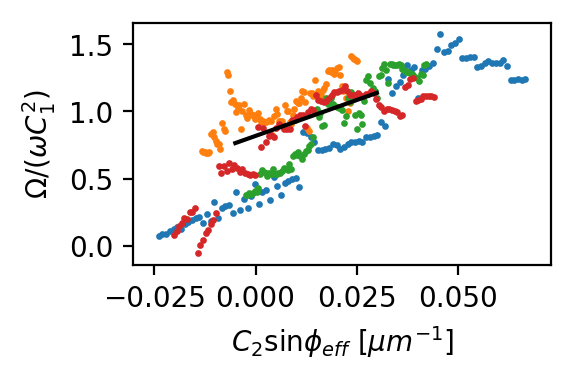

In [28]:
fig = plt.figure(figsize=(WIDTH/3.,1.6), dpi=200)
slope, intercept, r_value, p_value, std_err = stats.linregress(res_seas2.C2_SIN, 
                                                               res_seas2.phi_vel_normed_s_c0)
for exp, df in res_seas.dropna().groupby("exp"):
    y, bin_edge, nbins = stats.binned_statistic(df.C2_SIN, df.phi_vel_normed_s_c0, bins=100)
    x = (bin_edge[1:]+bin_edge[:-1])/2
    plt.scatter(x,y, s=2,label=exp.split("/")[-1])
s = np.linspace(-0.005,0.03,50)
plt.plot(s, s*slope+ intercept, c='k')
#plt.legend(ncol=2, fontsize=8, loc=3, 
#           bbox_to_anchor=(0,1.02,1.,.102), borderaxespad=0.)
plt.xlabel(r"$C_2 \sin \phi_{eff}\ [\mu m^{-1}]$")
plt.ylabel(r"$\Omega/(\omega C_1^2)$")
plt.savefig(FIG_DIR + "rotation_C2_sea_urchin.pdf")

/Local/rode/.conda/envs/py36/lib/python3.6/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]


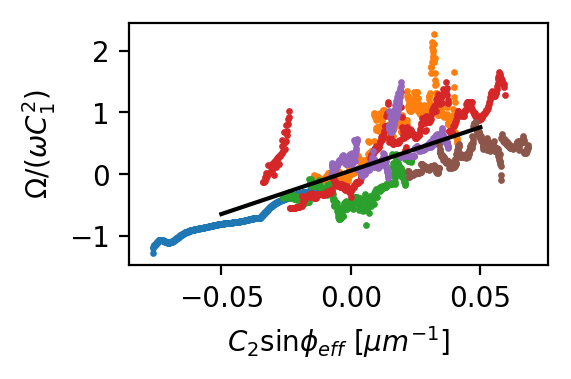

In [29]:
fig = plt.figure(figsize=(WIDTH/3.,1.6), dpi=200)
slope, intercept, r_value, p_value, std_err = stats.linregress(res_humans2.C2_SIN, 
                                                               res_humans2.phi_vel_normed_s_c0)
for exp, df in res_humans2.dropna().groupby("exp"):
    y, bin_edge, nbins = stats.binned_statistic(df.C2_SIN, df.phi_vel_normed_s_c0, bins=500)
    x = (bin_edge[1:]+bin_edge[:-1])/2
    plt.scatter(x,y, s=2,label=exp.split("/")[-1])
s = np.linspace(-0.05,0.05,50)
plt.plot(s, s*slope+ intercept, c='k')
#plt.legend(ncol=2, fontsize=8, loc=3, 
#           bbox_to_anchor=(0,1.02,1.,.102), borderaxespad=0.)
plt.xlabel(r"$C_2 \sin \phi_{eff}\ [\mu m^{-1}]$")
plt.ylabel(r"$\Omega/(\omega C_1^2)$")
plt.savefig(FIG_DIR + "rotation_C2_human.pdf")

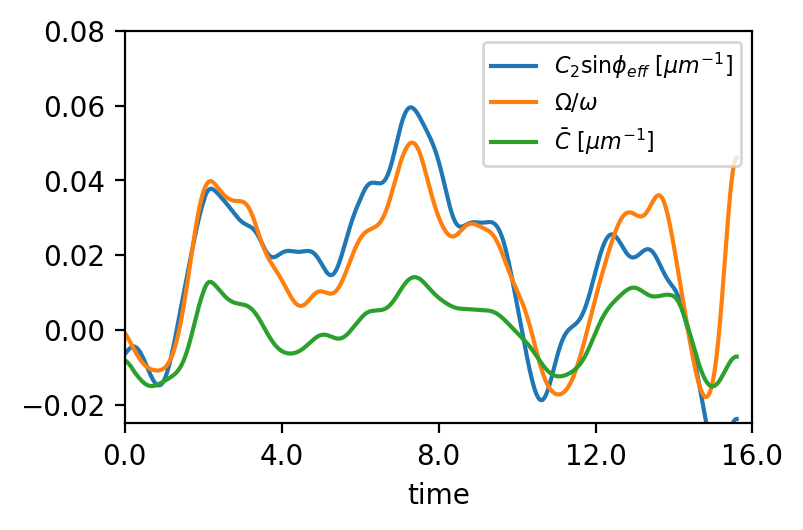

In [31]:
exp,df = list(res_humans2.groupby("exp"))[3]
df.set_index("time", inplace=True)

fig = plt.figure(figsize=(WIDTH/2., 2.6), dpi=200)
ax = plt.subplot(111)
df.C2_SIN.plot(label=r"$C_2 \sin\phi_{eff}\ [\mu m^{-1}]$")
df.phi_vel_normed_s.plot(label=r"$\Omega/\omega$")
df.kappa_mean_s.plot(label=r"$\bar{C}\ [\mu m^{-1}]$")
plt.legend(fontsize=8)
plt.xlim(2.5,15.)
plt.ylim(-0.025,0.08)
t = np.linspace(2.,18,5)
ax.set_xticks(t)
ax.set_xticklabels(t-t[0])
exps = exp.split("/")[-1]
plt.savefig(FIG_DIR + f"example_human_{exps}.pdf")

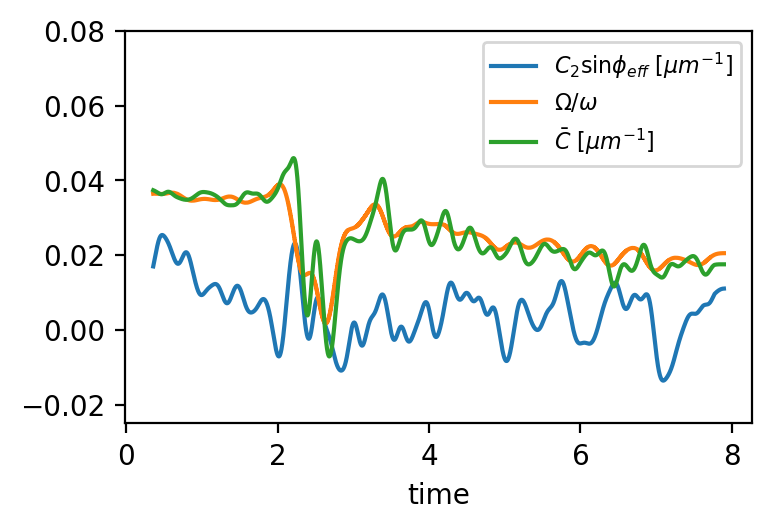

In [32]:
exp,df = list(res_seas2.groupby("exp"))[1]
df.set_index("time", inplace=True)
fig = plt.figure(figsize=(WIDTH/2., 2.6), dpi=200)

ax = plt.subplot(111)
df.C2_SIN.plot(label=r"$C_2 \sin\phi_{eff}\ [\mu m^{-1}]$")
df.phi_vel_normed_s.plot(label=r"$\Omega/\omega$")
df.kappa_mean_s.plot(label=r"$\bar{C}\ [\mu m^{-1}]$")
plt.legend(fontsize=8)
plt.ylim(-0.025,0.08)
exps = exp.split("/")[-1]
plt.savefig(FIG_DIR + f"example_sea_urchin_{exps}.pdf")

In [ ]:
## Minimal Data Export

In [ ]:
res_seas2.index.name = "index"
res_seas2.to_csv("../sea_urchins.csv", columns=["C2_SIN", "kappa_mean_s",
                                               "c2_plus_cm", "phi_vel_normed_s",
                                               "phi_vel_normed_s_c0", "exp"],
                  sep="\t")

In [ ]:
res_humans2.index.name = "index"
res_humans2.to_csv("../humans.csv", columns=["C2_SIN", "kappa_mean_s",
                                               "c2_plus_cm", "phi_vel_normed_s",
                                               "phi_vel_normed_s_c0", "exp"],
                  sep="\t")